In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
lines_df = pd.read_csv("../downloads/airlines.csv")
planes_df = pd.read_csv("../downloads/airplanes.csv")
airports_df = pd.read_csv("../downloads/airports.csv")
routes_df = pd.read_csv("../downloads/routes.csv")

In [118]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt



def departing_flights_country(country, internal=False): 
    """
    Retrieve and display information about departing flights from airports in a given country.

    Args:
        country (str): The name of the country for which departing flights will be retrieved.
        internal (bool, optional): If True, only internal flights (with destination in the same country) will be displayed. Defaults to False.

    Returns:
        None

    This method retrieves information about departing flights from airports in the specified country and displays it.
    It joins the routes and airports DataFrames to obtain flight information.
    It filters flights based on the given source country and optionally on whether they are internal.
    If internal is True, only flights with the same source and destination country are displayed.
    If there are no departing flights or no internal flights, appropriate messages are printed.
    """
    def plot_route(source_airport, dest_airport, source_lat, source_lon, dest_lat, dest_lon, ax):
        """
        Plots a single flight route on the given axis.
        """
        # Plot the flight route
        ax.plot([source_lon, dest_lon], [source_lat, dest_lat], 'ro-', transform=ccrs.PlateCarree())
        
        # Add airport markers
        ax.plot(source_lon, source_lat, 'bo', markersize=8, transform=ccrs.PlateCarree())
        ax.plot(dest_lon, dest_lat, 'bo', markersize=8, transform=ccrs.PlateCarree())
        
        # Add airport labels
        #ax.text(source_lon + 0.5, source_lat + 0.5, source_airport, transform=ccrs.PlateCarree())
        #ax.text(dest_lon + 0.5, dest_lat + 0.5, dest_airport, transform=ccrs.PlateCarree())
    
    def plot_all_routes(df):
        """
        Plots all flight routes from the given DataFrame on a map.
        """
        fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
    
        # Add geographical features
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')
    
        # Iterate over the rows in the DataFrame and plot each route
        for _, row in df.iterrows():
            source_airport = row['Source airport']
            dest_airport = row['Destination airport']
            source_lat = row['Source_lat']
            source_lon = row['Source_lon']
            dest_lat = row['Dest_lat']
            dest_lon = row['Dest_lon']
    
            plot_route(source_airport, dest_airport, source_lat, source_lon, dest_lat, dest_lon, ax)
    
        # Set the map extent to fit all routes
        max_lon = max(df['Source_lon'].max(), df['Dest_lon'].max())
        min_lon = min(df['Source_lon'].min(), df['Dest_lon'].min())
        max_lat = max(df['Source_lat'].max(), df['Dest_lat'].max())
        min_lat = min(df['Source_lat'].min(), df['Dest_lat'].min())
        ax.set_extent([min_lon - 5, max_lon + 5, min_lat - 5, max_lat + 5], crs=ccrs.PlateCarree())
    
        plt.title('All Flight Routes')
        plt.show()

    # Join on Source airport
    airport_info_1 = self.routes_df[['Source airport', 'Destination airport']].join(self.airports_df.set_index('IATA')[['Country', 'Latitude', 'Longitude']], on='Source airport')
    # Rename the column
    airport_info_1.rename(columns={'Country': 'Source Country', 'Latitude':'Source_lat', 'Longitude': 'Source_lon'}, inplace=True)
    airport_info_1[["Source Country", "Source_lat", "Source_lon", "Source airport", "Destination airport"]]

    airport_info_2 = airport_info_1.join(self.airports_df.set_index('IATA')[['Country', 'Latitude', 'Longitude']], on='Destination airport')
    # Rename the column if needed
    airport_info_2.rename(columns={'Country': 'Destination Country','Latitude':'Dest_lat', 'Longitude': 'Dest_lon'}, inplace=True)
    # Drop the additional index columns
    airport_info_2 = airport_info_2.reset_index(drop=True)
    
    # Filter flights based on the given source country
    source_flights = airport_info_2[airport_info_2['Source Country'] == country]
    source_flights = source_flights[~source_flights.duplicated()]
    
    # We only want to count each route 1 time - let's deal with this
    # Create a new column 'Route' that represents the route in a direction-agnostic way
    source_flights['Route'] = source_flights.apply(lambda x: '-'.join(sorted([x['Source airport'], x['Destination airport']])), axis=1)

    # Drop duplicates based on the 'Route' column
    source_flights = source_flights.drop_duplicates(subset=['Route'])

    # Drop the 'Route' column if you don't need it anymore
    source_flights = source_flights.drop('Route', axis=1)

    if internal:
        # Filter for internal flights (destination in the same country)
        source_flights = source_flights[source_flights['Source Country'] == source_flights['Destination Country']]

    # Check if there are any flights to display
    if not source_flights.empty:
        if internal:
            print(f"Internal flights from {country} to destinations in the same country:")
        else:
            print(f"All flights from {country}:")
    
        plot_all_routes(source_flights)

    else:
        print(f"No internal flights.")
    


    #return source_flights


All flights from Germany:


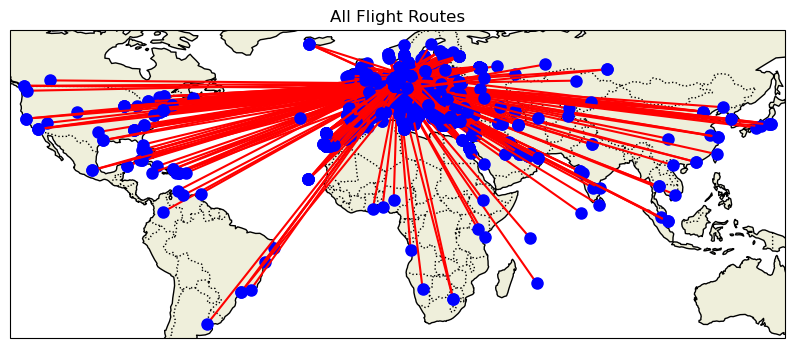

In [119]:
df = departing_flights_country('Germany')

In [102]:
df

,Source airport,Destination airport,Source Country,Source_lat,Source_lon,Destination Country,Dest_lat,Dest_lon
419,DUS,FDH,Germany,51.289501,6.766780,Germany,47.671299,9.511490
426,FDH,HAM,Germany,47.671299,9.511490,Germany,53.630402,9.988230
428,FDH,TXL,Germany,47.671299,9.511490,Germany,52.559700,13.287700
1253,BRE,STR,Germany,53.047501,8.786670,Germany,48.689899,9.221960
1283,CGN,DRS,Germany,50.865898,7.142740,Germany,51.132801,13.767200
...,...,...,...,...,...,...,...,...
50675,BRE,LEJ,Germany,53.047501,8.786670,Germany,51.423889,12.236389
62445,BRE,FMO,Germany,53.047501,8.786670,Germany,52.134602,7.684830
62454,FMO,STR,Germany,52.134602,7.684830,Germany,48.689899,9.221960
62472,MHG,TXL,Germany,49.473057,8.514167,Germany,52.559700,13.287700


In [33]:
df[~df.duplicated()]

,Source Country,Source airport,Destination airport,Destination Country
418,Germany,DRS,ZRH,Switzerland
419,Germany,DUS,FDH,Germany
424,Germany,FDH,DUS,Germany
425,Germany,FDH,EBA,Italy
426,Germany,FDH,HAM,Germany
...,...,...,...,...
65523,Germany,HAJ,ADB,Turkey
65544,Germany,TXL,ADB,Turkey
66168,Germany,DUS,TGD,Montenegro
66170,Germany,FRA,TGD,Montenegro


In [58]:
df.iloc[:, 5: ]

,Destination airport,Destination airport ID,Codeshare,Stops,Equipment,Source Country,index_dest,Airport ID,Name,City,Destination Country,ICAO,Latitude,Longitude,Altitude,Timezone,DST,Tz database time zone,Type,Source
419,FDH,382,NaN,0,DH3,Germany,378.0,382.0,Friedrichshafen Airport,Friedrichshafen,Germany,EDNY,47.671299,9.511490,1367.0,1,E,Europe/Berlin,airport,OurAirports
424,DUS,345,NaN,0,DH3,Germany,341.0,345.0,Düsseldorf Airport,Duesseldorf,Germany,EDDL,51.289501,6.766780,147.0,1,E,Europe/Berlin,airport,OurAirports
426,HAM,342,NaN,0,AT7,Germany,338.0,342.0,Hamburg Airport,Hamburg,Germany,EDDH,53.630402,9.988230,53.0,1,E,Europe/Berlin,airport,OurAirports
428,TXL,351,NaN,0,AT7,Germany,347.0,351.0,Berlin-Tegel Airport,Berlin,Germany,EDDT,52.559700,13.287700,122.0,1,E,Europe/Berlin,airport,OurAirports
432,FDH,382,NaN,0,AT7,Germany,378.0,382.0,Friedrichshafen Airport,Friedrichshafen,Germany,EDNY,47.671299,9.511490,1367.0,1,E,Europe/Berlin,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65198,MUC,346,NaN,0,73H,Germany,342.0,346.0,Munich Airport,Munich,Germany,EDDM,48.353802,11.786100,1487.0,1,E,Europe/Berlin,airport,OurAirports
65276,FRA,340,NaN,0,73H,Germany,336.0,340.0,Frankfurt am Main Airport,Frankfurt,Germany,EDDF,50.033333,8.570556,364.0,1,E,Europe/Berlin,airport,OurAirports
65313,DUS,345,NaN,0,73H,Germany,341.0,345.0,Düsseldorf Airport,Duesseldorf,Germany,EDDL,51.289501,6.766780,147.0,1,E,Europe/Berlin,airport,OurAirports
65328,ZQW,393,NaN,0,73H,Germany,389.0,393.0,Zweibrücken Airport,Zweibruecken,Germany,EDRZ,49.209400,7.400560,1132.0,1,E,Europe/Berlin,airport,OurAirports


In [7]:
# Join on Destination airport
airport_info_2 = airport_info_1.join(airports_df.set_index('IATA'), on='Destination airport', rsuffix='_dest')
# Rename the column if needed
airport_info_2.rename(columns={'Country': 'Destination Country'}, inplace=True)
# Drop the additional index columns
airport_info_2 = airport_info_2.reset_index(drop=True)

In [ ]:
    
    # Filter flights based on the given source country
    source_flights = airport_info_2[airport_info_2['Source Country'] == country]

    if internal:
        # Filter for internal flights (destination in the same country)
        source_flights = source_flights[source_flights['Source Country'] == source_flights['Destination Country']]

    # Check if there are any flights to display
    if not source_flights.empty:
        if internal:
            print(f"Internal flights from {country} to destinations in the same country:")
        else:
            print(f"All flights from {country}:")

        print(source_flights[['Source Country', 'Source airport', 'Destination airport', 'Destination Country']])
    else:
        print(f"No internal flights.")